# Phân loại ảnh chó/mèo sử dụng CNN
Mô tả tập dữ liệu:
- Tập dữ liệu huấn luyện bao gồm 25000 bức ảnh chó và mèo.
- Mục đích: gán nhãn cho các bức ảnh trong tập dữ liệu test1 (12500 hình ảnh).
- Nguồn: https://www.kaggle.com/c/dogs-vs-cats

### 1. Import thư viện


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

import random
import zipfile

### 2. Tiền xử lí dữ liệu

In [2]:
dataset_label = ["cat", "dog"]

In [3]:
dataset_x = []
dataset_y = []

zip_path = "/content/train.zip"
archive = zipfile.ZipFile(zip_path, "r")
file_names = archive.namelist()
file_names.remove(file_names[0])

for file_name in file_names:
  img_file = archive.open(file_name)
  img_data = img_file.read()
  img = tf.image.decode_jpeg(img_data, channels=3)
  img = tf.image.resize(img, [128, 128])
  img = tf.cast(img, tf.uint8)
  img_array = np.array(img)
  dataset_x.append(img_array)
  img_file.close()

  if "cat" in file_name:
    dataset_y.append(0)
  else:
    dataset_y.append(1)

dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)
print(dataset_x.shape)
print(dataset_y.shape)

(25000, 128, 128, 3)
(25000,)


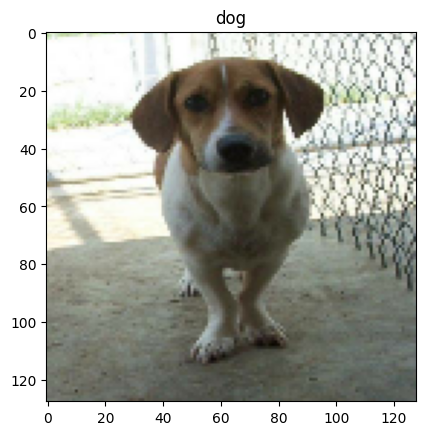

In [12]:
pic = random.randint(0, len(dataset_x))
plt.imshow(dataset_x[pic])
plt.title(dataset_label[dataset_y[pic]])
plt.show()

In [61]:
def plot_data(x, y=None, predict=None):
  nrows, ncols = 2, 5
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))
  len_x = x.shape[0]

  for idx in range(nrows * ncols):
    # Get random img to plot
    img_idx = random.randint(0, len_x)

    # Set title
    img_title = ""
    if y is not None:
      img_title += f"Label: {dataset_label[y[img_idx]]}\n"
    if predict is not None:
      img_title += f"Predict: {dataset_label[np.argmax(predict[img_idx])]}\n"

    # Plot
    ax = axs[idx // ncols, idx % ncols]
    ax.set(xticks=[], yticks=[])
    ax.imshow(x[img_idx])
    ax.set_xlabel(img_title, fontsize=12)

  plt.tight_layout()
  plt.show()

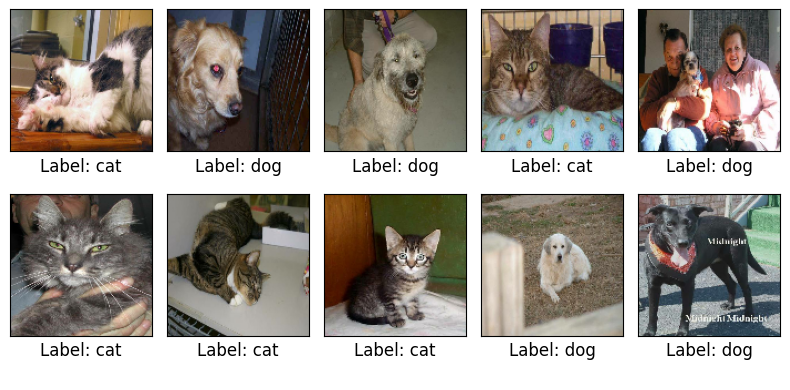

In [62]:
plot_data(dataset_x, dataset_y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)

In [17]:
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_test_cnn = np.expand_dims(x_test, axis=-1)
print(x_train_cnn.shape)
y_train_cnn = tf.keras.utils.to_categorical(y_train, len(dataset_label))
y_test_cnn = tf.keras.utils.to_categorical(y_test, len(dataset_label))
print(y_train_cnn[0])

(20000, 128, 128, 3, 1)
[1. 0.]


### 3. Model

- Xây dựng mô hình

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[128, 128, 3]),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(4, 4)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(4, 4)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,890 (351.13 KB)

 Trainable params: 89,890 (351.13 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

- Training

In [88]:
epochs = 20
batch_size = 128
train_model = model.fit(x_train_cnn,
                        y_train_cnn,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        )

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9092 - loss: 0.2168 - val_accuracy: 0.8005 - val_loss: 0.5281
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9125 - loss: 0.2132 - val_accuracy: 0.7925 - val_loss: 0.6093
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9130 - loss: 0.2055 - val_accuracy: 0.8025 - val_loss: 0.6168
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9174 - loss: 0.1880 - val_accuracy: 0.8110 - val_loss: 0.5839
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9296 - loss: 0.1676 - val_accuracy: 0.8055 - val_loss: 0.5873
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9324 - loss: 0.1671 - val_accuracy: 0.7965 - val_loss: 0.6362
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9276 - loss: 0.1729 - val_accuracy: 0.8115 - val_loss: 0.5641
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9370 - loss: 0.1549 - val_accu

- Đánh giá

In [89]:
score = model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print("Test accuracy:", score[1])
print("Test loss:", score[0])

Test accuracy: 0.8137999773025513
Test loss: 0.8702947497367859


In [90]:
predict = model.predict(x_test_cnn)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


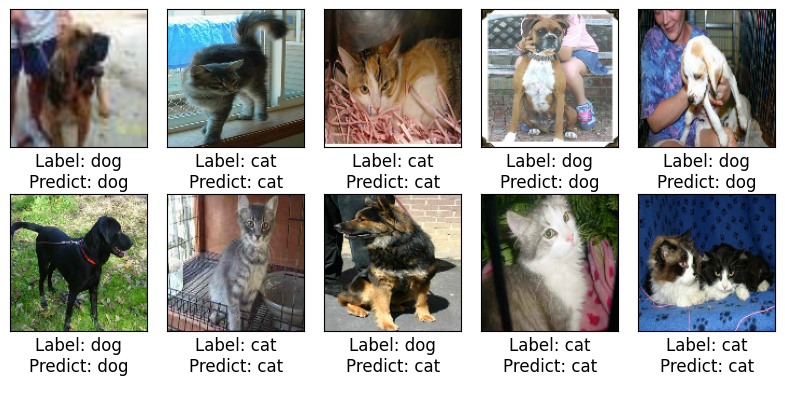

In [91]:
plot_data(x_test, y_test, predict)

- Save model

In [92]:
model.save("/content/mymodel.keras")

In [93]:
model = tf.keras.models.load_model("/content/mymodel.keras")

- Kiểm tra phân loại 1 số bức hình ngoài

In [94]:
def test(img_path):
  file = open(img_path, "rb")
  img_data = file.read()
  img = tf.image.decode_jpeg(img_data, channels=3)
  img = tf.image.resize(img, [128, 128])
  img = tf.cast(img, tf.uint8)
  img_array = np.array(img)
  file.close()

  img_input = np.expand_dims(img_array, axis=-1)
  img_input = np.expand_dims(img_input, axis=0)
  predict = np.argmax(model.predict(img_input)[0])

  plt.imshow(img_array)
  plt.title(dataset_label[predict])
  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


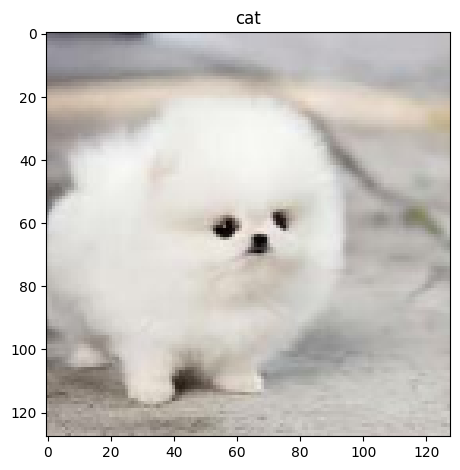

In [99]:
test("/content/6.jpg")

### 4. Gán nhãn cho tập test1

In [109]:
testset_x = []

zip_path = "/content/test1.zip"
archive = zipfile.ZipFile(zip_path, "r")
file_names = archive.namelist()
file_names.remove(file_names[0])

for file_name in file_names:
  img_file = archive.open(file_name)
  img_data = img_file.read()
  img = tf.image.decode_jpeg(img_data, channels=3)
  img = tf.image.resize(img, [128, 128])
  img = tf.cast(img, tf.uint8)
  img_array = np.array(img)
  testset_x.append(img_array)
  img_file.close()

testset_x = np.array(testset_x)
print(testset_x.shape)

(12500, 128, 128, 3)


In [110]:
testset_x_cnn = np.expand_dims(testset_x, axis=-1)
print(testset_x_cnn.shape)

(12500, 128, 128, 3, 1)


In [111]:
test_predict = model.predict(testset_x_cnn)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


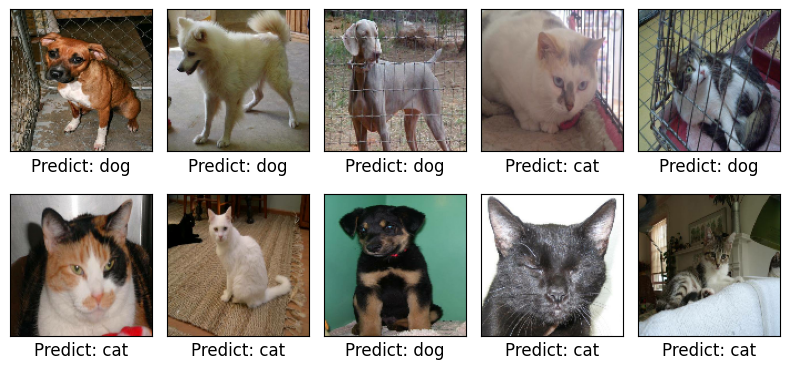

In [112]:
plot_data(testset_x, predict=test_predict)

In [115]:
result = []
for i in range(len(test_predict)):
  result.append(np.argmax(test_predict[i]))
df = {
    "id": range(1, len(result) + 1),
    "label": result
}
pd.DataFrame(df).to_csv("/content/submission.csv", index=False, header=True)